<a href="https://colab.research.google.com/github/ferrefab/pythonProject/blob/main/ferrefab_galejua_pythonProject_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Einleitung**

In diesem Notebook liegt der Fokus auf dem Training und der Evaluierung von Machine-Learning-Modellen im Rahmen unseres Projekts. Konkret führen wir folgende Schritte durch:

1. Training von zwei Regressionsmodellen:
   - **Random Forest Regressor**
   - **Lineare Regression**
2. Training eines Klassifikationsmodells, wobei zusätzliches **Feature Engineering** durchgeführt wird, um eine sinnvole Zielvariable abzuleiten.

Wir setzen auch **eXplainable AI (XAI)-Techniken** ein um die Robustheit und Interpretierbarkeit unseres Random Forest Regressors zu analyisieren um seine praktische Anwendbarkeit zu bewerten.

Dieses Notebook ist der letzte und 3. Teil von unserem Coffee Project. Besten Dank fürs lesen!

**Model 1: RandomForestRegressor**

In [ ]:
import requests

def download_file(url, target_path):
  try:
    response = requests.get(url)
    response.raise_for_status()
    with open(target_path, "wb")as f:
      f.write(response.content)
    print(f"Downloaded file {target_path}")
  except requests.exceptions.RequestException as e:
    print(f"Failed to Download {url}. Error: {e}")

# die fertig verarbeitete Datei von Part2 wird hiermit geladen
files_to_download = [
    ('https://raw.githubusercontent.com/galeajua/coffee-brewer/master/data/cotter_processed.csv', 'cotter_processed.csv'),
]

for url, path in files_to_download:
  download_file(url, path)

Downloaded file cotter_processed.csv


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("cotter_processed.csv")
data.head()

,dose_grams,setting,grind,brew_mass_grams,total_dissolved_solids_percent,extraction_percent,ph,brew temperature,score,temp,...,nutty,dark_chocolate,caramel,bitter,astringent,roasted,sour,thick_viscous,sweet,rubber
0,176.1,1SM,5,2829.1,1.05,16.868568,5.05,81.1,6,4,...,False,False,False,False,False,False,False,False,False,True
1,145.0,6LG,3,2905.9,0.97,19.439468,5.01,81.0,4,2,...,False,False,False,False,True,False,False,False,False,True
2,119.0,4LG,3,2884.1,0.96,23.266690,5.11,78.6,2,4,...,True,False,False,False,False,False,False,False,False,False
3,215.3,12LG,5,2811.1,1.07,13.970632,5.08,80.4,7,3,...,False,False,False,False,False,False,False,False,False,False
4,176.1,12LG,3,2869.2,1.27,20.692130,5.02,80.8,8,3,...,True,True,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Target und Features definieren
target = "score"
categorical_features = ["setting", "grind"]
numerical_features = [col for col in data.columns if col not in categorical_features + [target]]

# Kategorische Features OneHotEncoden
encoder = OneHotEncoder()
encoded_cats = pd.DataFrame(encoder.fit_transform(data[categorical_features]).toarray(), columns=encoder.get_feature_names_out())

# Features kombinieren
X = pd.concat([data[numerical_features], encoded_cats], axis=1)
y = data[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)

# Training
model.fit(X_train, y_train)

# Testing
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1.0260986394557823
Mean Squared Error (MSE): 1.6199645367608582
R² Score: 0.49489743202463476


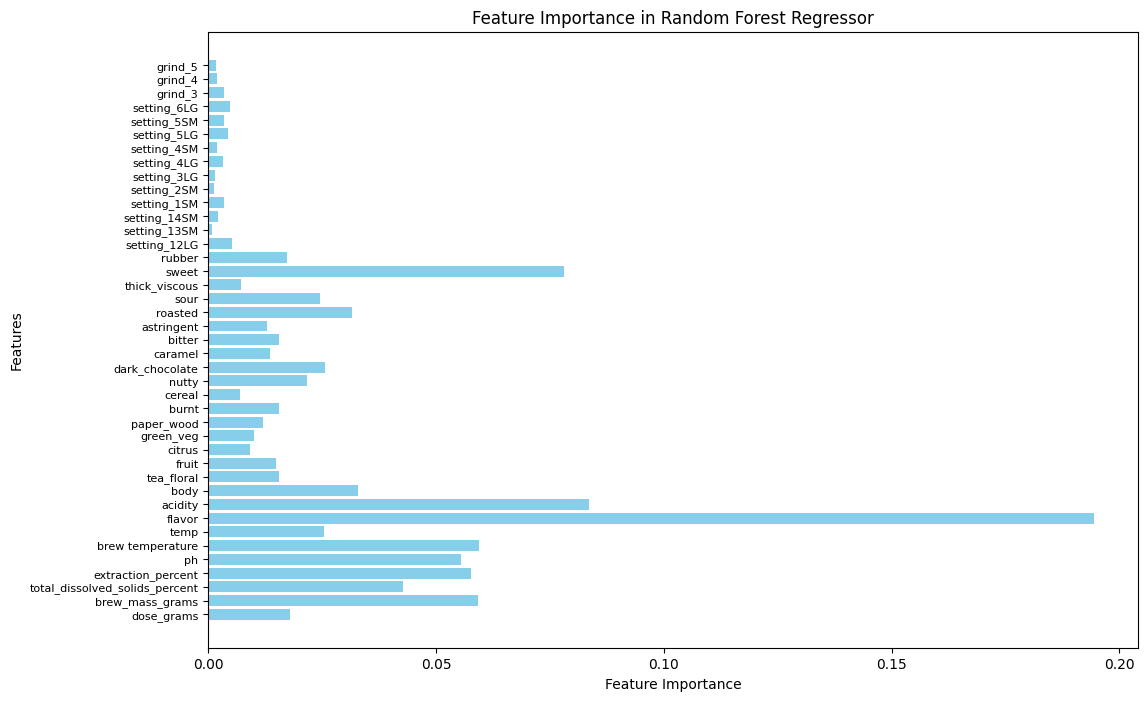

In [ ]:
# Erste feature importance Analyse
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Regressor")
tick_range = np.arange(0.0, 0.21, 0.05)
plt.xticks(tick_range, fontsize=10)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
# Model speichern
import joblib
joblib.dump(model, "coffee_regression_model.pkl")


['coffee_regression_model.pkl']

**Den Besten Schwarzen Kaffe mit dem RandomForestRegressor vorhersagen**

In [ ]:
# eine möglichkeit den besten Kaffee zu predicten mit dem Regressionsmodell, ist verschiedene Kombinationen von Kaffees zu generieren und das Model alle bewerten lassen
# die Kombination mit dem grössten Score ist theoretische der beste Schwarzer Kaffee
parameter_grid = {
    'dose_grams': np.linspace(10, 250, 5),
    'brew_mass_grams': np.linspace(200, 3000, 20),
    'total_dissolved_solids': [0.8, 1.0, 1.2],
    'extraction_percent': np.linspace(15, 25, 10),
    'ph': np.linspace(5.0, 5.5, 6),
    'temp': np.linspace(85, 95,5),
    'flavor': np.linspace(0.1, 0.5, 5),
    'acidity': np.linspace(1, 5, 5),
    'body': np.linspace(1, 5, 5),
    'setting_12LG': [0, 1],
    'setting_13SM': [0, 1],
    # settings begrenzt für die prediction
    'grind_3': [0, 1],
    'grind_4': [0, 1],
}

In [ ]:
import random

# Anzahl samples für die prediction
n_samples = 1000

random_samples = []
for _ in range(n_samples):
    sample = {key: random.choice(values) for key, values in parameter_grid.items()}
    random_samples.append(sample)

candidate_data = pd.DataFrame(random_samples)


In [ ]:
model = joblib.load("coffee_regression_model.pkl")
# die gleichen Features des trainierten Models nutzen für die prediction
expected_features = model.feature_names_in_
for feature in expected_features:
    if feature not in candidate_data.columns:
        candidate_data[feature] = 0  # Hier werden default Werte vergeben an allfällige fehlende Features

candidate_data = candidate_data[expected_features]

candidate_data['predicted_score'] = model.predict(candidate_data)
ideal_parameters = candidate_data.sort_values('predicted_score', ascending=False).head(10)

# Die besten Kombination einer csv Date gespeichert und wiedergeben
print("Die besten schwarzen Kaffees wurden gespeichert in der csv Datei")
ideal_parameters.to_csv("top_blackCoffee.csv", index=False)
ideal_parameters.head()


Die besten schwarzen Kaffees wurden gespeichert in der csv Datei


,dose_grams,brew_mass_grams,total_dissolved_solids_percent,extraction_percent,ph,brew temperature,temp,flavor,acidity,body,...,setting_3LG,setting_4LG,setting_4SM,setting_5LG,setting_5SM,setting_6LG,grind_3,grind_4,grind_5,predicted_score
710,130.0,789.473684,0,16.111111,5.2,0,90.0,0.3,3.0,4.0,...,0,0,0,0,0,0,1,1,0,5.24
506,10.0,1378.947368,0,16.111111,5.1,0,90.0,0.3,5.0,1.0,...,0,0,0,0,0,0,1,1,0,5.23
821,190.0,936.842105,0,16.111111,5.5,0,90.0,0.3,5.0,4.0,...,0,0,0,0,0,0,0,1,0,5.21
120,70.0,494.736842,0,16.111111,5.5,0,87.5,0.3,4.0,4.0,...,0,0,0,0,0,0,0,1,0,5.21
80,190.0,642.105263,0,16.111111,5.2,0,85.0,0.3,4.0,5.0,...,0,0,0,0,0,0,0,1,0,5.21


**Model 2: Linear Regression**

In [ ]:
import pandas as pd

data = pd.read_csv("cotter_processed.csv")
data.head()

,dose_grams,setting,grind,brew_mass_grams,total_dissolved_solids_percent,extraction_percent,ph,brew temperature,score,temp,...,nutty,dark_chocolate,caramel,bitter,astringent,roasted,sour,thick_viscous,sweet,rubber
0,176.1,1SM,5,2829.1,1.05,16.868568,5.05,81.1,6,4,...,False,False,False,False,False,False,False,False,False,True
1,145.0,6LG,3,2905.9,0.97,19.439468,5.01,81.0,4,2,...,False,False,False,False,True,False,False,False,False,True
2,119.0,4LG,3,2884.1,0.96,23.266690,5.11,78.6,2,4,...,True,False,False,False,False,False,False,False,False,False
3,215.3,12LG,5,2811.1,1.07,13.970632,5.08,80.4,7,3,...,False,False,False,False,False,False,False,False,False,False
4,176.1,12LG,3,2869.2,1.27,20.692130,5.02,80.8,8,3,...,True,True,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Target und Features definieren
target = "score"
categorical_features = ["setting", "grind"]
numerical_features = [col for col in data.columns if col not in categorical_features + [target]]

# Kategorische Features OneHotEncoden
encoder = OneHotEncoder()
encoded_cats = pd.DataFrame(encoder.fit_transform(data[categorical_features]).toarray(), columns=encoder.get_feature_names_out())

# Features kombinieren
X = pd.concat([data[numerical_features], encoded_cats], axis=1)
y = data[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()

# Training
model.fit(X_train, y_train)

# Testing
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1.1581991926079236
Mean Squared Error (MSE): 2.1431010256141456
R² Score: 0.33178424162741893


In [ ]:
import joblib
joblib.dump(model, "linear_regression_score_model.pkl")

['linear_regression_score_model.pkl']

**Model 3: Classification Model (Scores into High, Medium or Low)**

In [ ]:
import pandas as pd

data = pd.read_csv("cotter_processed.csv")
data.head()

,dose_grams,setting,grind,brew_mass_grams,total_dissolved_solids_percent,extraction_percent,ph,brew temperature,score,temp,...,nutty,dark_chocolate,caramel,bitter,astringent,roasted,sour,thick_viscous,sweet,rubber
0,176.1,1SM,5,2829.1,1.05,16.868568,5.05,81.1,6,4,...,False,False,False,False,False,False,False,False,False,True
1,145.0,6LG,3,2905.9,0.97,19.439468,5.01,81.0,4,2,...,False,False,False,False,True,False,False,False,False,True
2,119.0,4LG,3,2884.1,0.96,23.266690,5.11,78.6,2,4,...,True,False,False,False,False,False,False,False,False,False
3,215.3,12LG,5,2811.1,1.07,13.970632,5.08,80.4,7,3,...,False,False,False,False,False,False,False,False,False,False
4,176.1,12LG,3,2869.2,1.27,20.692130,5.02,80.8,8,3,...,True,True,False,False,False,False,False,False,False,False


In [ ]:
# Feature engineering für Score Kategorisierung in low, medium und high
def categorize_values(value):
  if value < 3.5:
    return "low"
  elif 3.5 <= value < 6.5:
    return "medium"
  else:
    return "high"

data['score_category'] = data['score'].apply(categorize_values)
data.head(20)

,dose_grams,setting,grind,brew_mass_grams,total_dissolved_solids_percent,extraction_percent,ph,brew temperature,score,temp,...,dark_chocolate,caramel,bitter,astringent,roasted,sour,thick_viscous,sweet,rubber,score_category
0,176.1,1SM,5,2829.1,1.050,16.868568,5.05,81.1,6,4,...,False,False,False,False,False,False,False,False,True,medium
1,145.0,6LG,3,2905.9,0.970,19.439468,5.01,81.0,4,2,...,False,False,False,True,False,False,False,False,True,medium
2,119.0,4LG,3,2884.1,0.960,23.266690,5.11,78.6,2,4,...,False,False,False,False,False,False,False,False,False,low
3,215.3,12LG,5,2811.1,1.070,13.970632,5.08,80.4,7,3,...,False,False,False,False,False,False,False,False,False,high
4,176.1,12LG,3,2869.2,1.270,20.692130,5.02,80.8,8,3,...,True,False,False,False,False,False,False,False,False,high
5,150.0,13SM,4,2919.5,1.095,21.312350,5.04,78.0,6,3,...,True,False,False,False,True,False,False,False,False,medium
6,252.7,5LG,5,2747.2,1.520,16.524511,5.04,80.3,8,4,...,True,False,False,False,True,False,False,False,False,high
7,207.6,5LG,3,2793.7,1.490,20.051123,5.06,80.2,8,4,...,True,True,False,False,False,False,False,False,False,high
8,176.1,4LG,3,2843.5,1.430,23.090319,4.98,78.7,3,3,...,False,False,True,True,False,True,False,False,False,low
9,176.1,6LG,5,2862.8,1.000,16.256672,5.06,83.3,7,4,...,False,False,False,False,False,True,False,False,False,high


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Target & Features
target = "score_category"
categorical_features = ["setting", "grind"]
numerical_features = [col for col in data.columns if col not in categorical_features + [target, "score"]]

# Encode kategorische features
encoder = OneHotEncoder()
encoded_cats = pd.DataFrame(encoder.fit_transform(data[categorical_features]).toarray(), columns=encoder.get_feature_names_out())

# Features kombinieren
X = pd.concat([data[numerical_features], encoded_cats], axis=1)
y = data[target]

# target encodieren
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)

# Training
model.fit(X_train, y_train)

# Testing
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.640502354788069

Classification Report:
              precision    recall  f1-score   support

        high       0.71      0.63      0.67       260
         low       0.59      0.14      0.23        70
      medium       0.60      0.77      0.67       307

    accuracy                           0.64       637
   macro avg       0.63      0.51      0.52       637
weighted avg       0.64      0.64      0.62       637



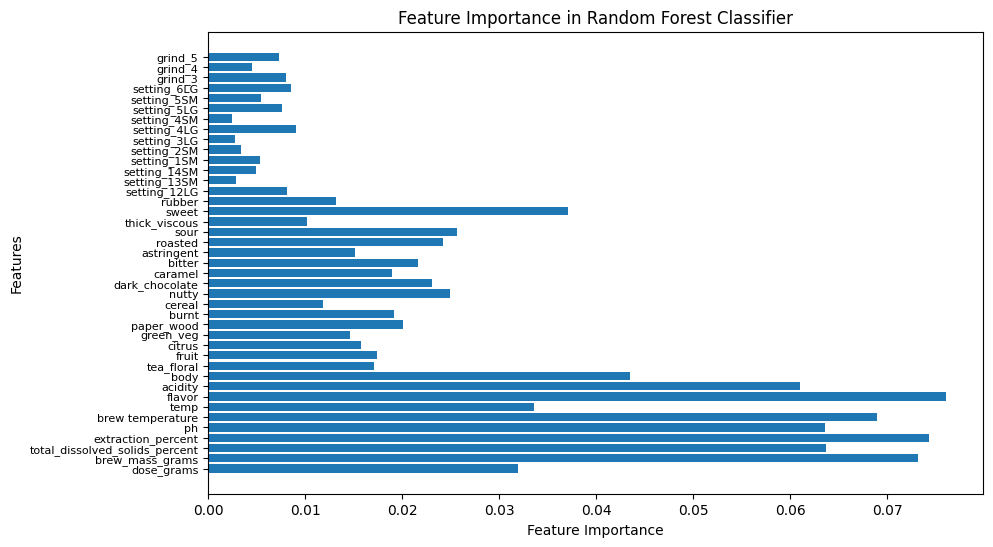

In [ ]:
# Feature importance
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Classifier")
plt.yticks(fontsize=8)
plt.show()


In [ ]:
import joblib
joblib.dump(model, "score_classification_model.pkl")

['score_classification_model.pkl']

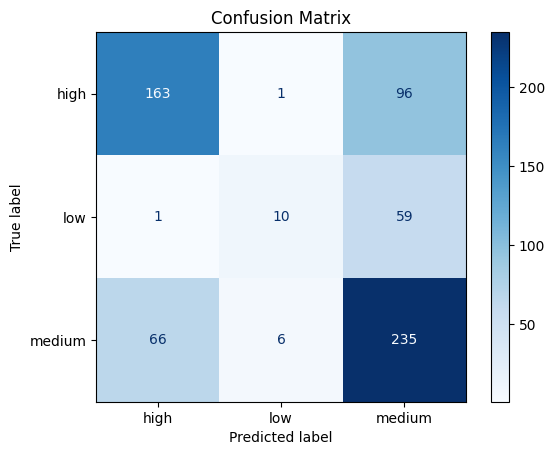

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


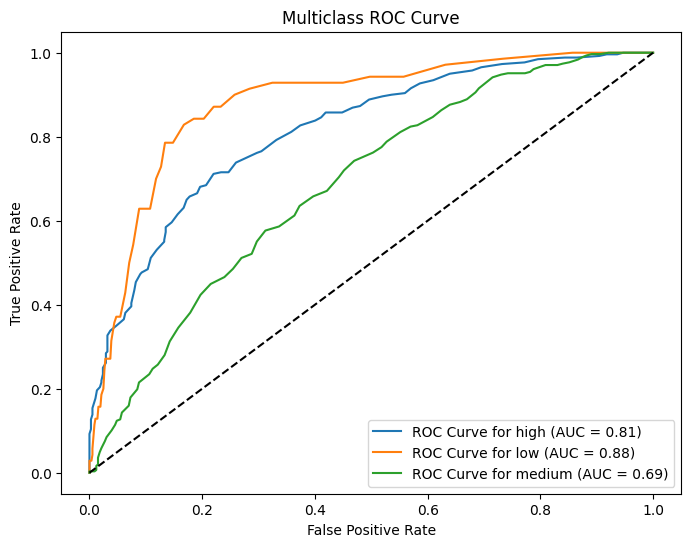

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

y_pred_prob = model.predict_proba(X_test)

# ROC Kurve für jede Klasse
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve for {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="best")
plt.show()


# **XAI-Techniken**

In [ ]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

model = joblib.load("coffee_regression_model.pkl")
data = pd.read_csv("cotter_processed.csv")

In [ ]:
target = "score"
categorical_features = ["setting", "grind"]
numerical_features = [col for col in data.columns if col not in categorical_features + [target]]

encoder = OneHotEncoder()
encoded_cats = pd.DataFrame(encoder.fit_transform(data[categorical_features]).toarray(), columns=encoder.get_feature_names_out())

X = pd.concat([data[numerical_features], encoded_cats], axis=1)
y = data[target]

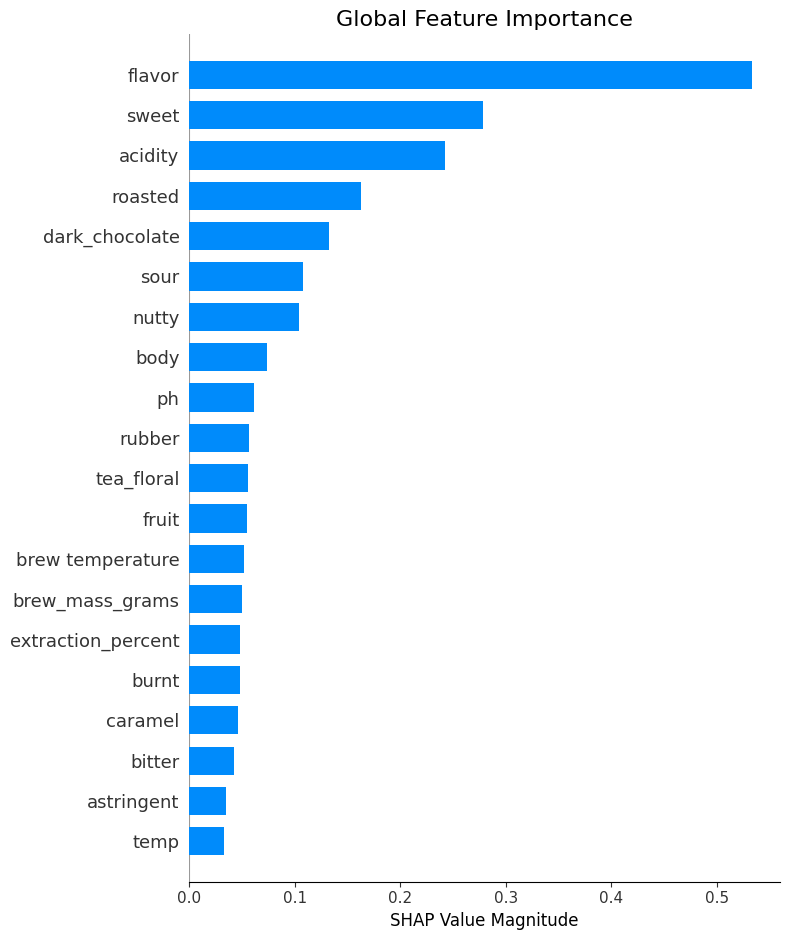

In [ ]:
# SHAP explanation & Global Feature importance
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("Global Feature Importance", fontsize=16)
plt.xlabel("SHAP Value Magnitude", fontsize=12)
plt.tight_layout()
plt.show()

sample_idx = 0

local_shap = explainer.shap_values(X.iloc[sample_idx:sample_idx + 1])[0]
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]
local_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(local_shap)
}).sort_values('importance', ascending=True)


<Figure size 1000x600 with 0 Axes>

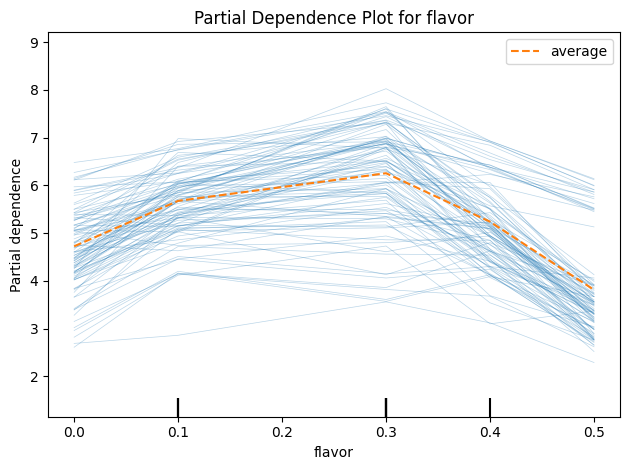

<Figure size 1000x600 with 0 Axes>

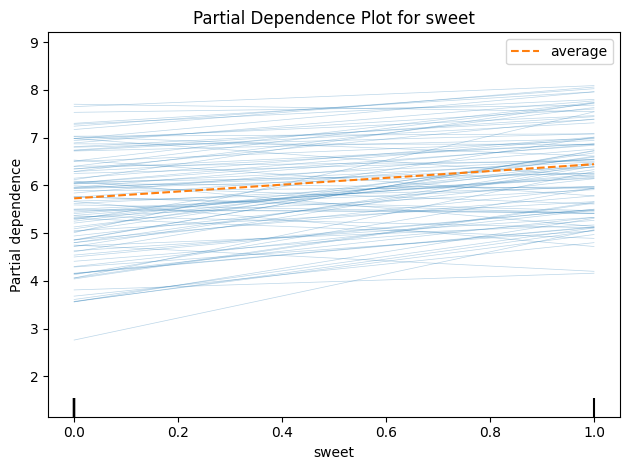

<Figure size 1000x600 with 0 Axes>

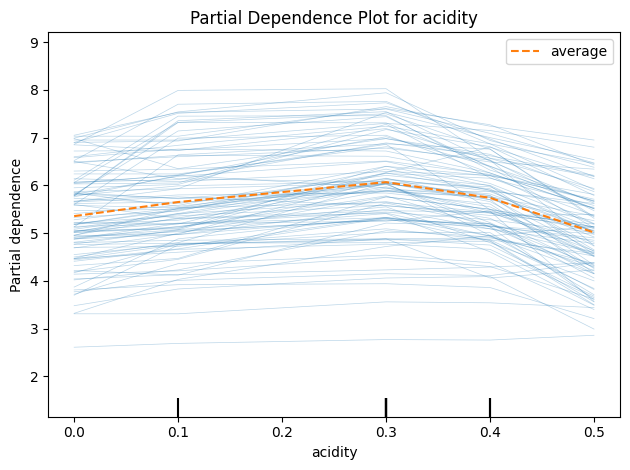

In [ ]:
# partial dependence plot generator
from sklearn.inspection import PartialDependenceDisplay

def plot_partial_dependence(model, X, feature, kind='both', subsample=100, random_state=42):
  plt.figure(figsize=(10, 6))
  PartialDependenceDisplay.from_estimator(
      model,
      X,
      [feature],
      kind=kind,
      subsample=subsample,
      random_state=random_state
  )
  plt.title(f"Partial Dependence Plot for {feature}")
  plt.tight_layout()
  plt.show()

plot_partial_dependence(model, X, 'flavor')
plot_partial_dependence(model, X, 'sweet')
plot_partial_dependence(model, X, 'acidity')